Vorbereitung:

In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd
import collections
import statistics

saving_plots = False
#Für thom Sammlung:
rc = np.array([0,1,2,4,10])

In [2]:
def ana_t(thom):
    if len(thom.shape)==1:
        plot_thom_hist(thom)
    else:
        plot_thom_rc(thom)

def plot_thom_hist(thom, save=False):
    max = thom.max().astype(int)
#     print(max)
    counter=collections.Counter(thom.astype(int))
#     print(counter)
    val = np.zeros(max+1)
# #     print(counter.keys())
    for key in counter.keys():
#         print(key)
        val[key] = counter[key]

    fig, ax = plt.subplots()
    plt.xlim(0, max+1)
#     plt.ylim(0, val.max())
    plt.yticks(np.arange(0, val.max()+0.2, 1))
    ax.set(xlabel='t_hom', ylabel='absolute frequency')
    time = range(0,max+1)
    plt.bar(time, val, color='cyan', edgecolor='blue', width=0.5)
    plt.show()
    
def plot_thom_rc(thom, save=False):
    wdh, ver = thom.shape
    print(wdh, ver)
    up = np.zeros(ver)
    mean = np.zeros(ver)
    lo = np.zeros(ver)
    
    for v in range(0,ver):
#         print(v)
        lo[v] = thom[:,v].min()
        up[v] = thom[:,v].max()
        mean[v] = thom[:,v].mean()
#     print(lo, up, mean)
    plt.xlim(0,rc.max())
    data = pd.DataFrame({'x': rc, 'lower': lo, 'mean': mean, 'upper': up})
    plt.plot( 'x', 'lower', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label='min')
    plt.plot( 'x', 'mean', data=data, marker='o', markersize=7, color='seagreen', linewidth=2, label='mean')
    plt.plot( 'x', 'upper', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label="max")
    plt.legend()
    #if save:

def verteilung(thom, li):
    max = thom.max().astype(int)
    l = len(thom)
    #intervalllänge
#     li = 500
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni)
#     sort = np.sort(thom)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1
    
    if count.sum() != 100:
        print('FEHLER!')
    else:
        print(count)
        
    fig, ax = plt.subplots()
    x = np.arange(0, ni)
    y = count[x]
    ax.plot(x, y)
    plt.xlim(0,ni-1)
    plt.ylim(0, y.max()+1)
    ax.set(xlabel='intervall', ylabel='absolut')
    plt.show()

def verteilung_bar(thom, li):
    max = thom.max().astype(int)
    l = len(thom)
    #intervalllänge
#     li = 500
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni+1)
    #     sort = np.sort(thom)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1

    # if count1.sum() != 100:
    #     print('FEHLER!')
    # else:
    #     print(count)
    ###
    # plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
    # # Create green bars (top)
    # plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)

    ###
    fig, ax = plt.subplots()
    x = np.arange(0, max + li, li)
#     print(x1, x2)
    y = count[(x/li).astype(int)]
#     y2 = count[(x2/li2).astype(int)]
    plt.bar(x+li/2, y, width=li, color='cyan', edgecolor='blue', alpha=0.5)
    # plt.bar(x2, y2, width=li2, color='cyan', edgecolor='blue', alpha = 0.5)
    plt.xlim(0, max + li)
    plt.ylim(0, y.max()+1)
    # # plt.xticks(np.arange(0, 2000)) 
    ax.set(xlabel='intervall', ylabel='absolut')
    plt.show()



Daten einlesen:

In [3]:
name = '18090_th'
thom = np.load('saved_data/' + name +'.npy')
%matplotlib notebook
# thom = np.array([[1,2,3,3,5], [7,10,1,15,2]])
# t = np.array([1,10,7,6])

# ana_t(thom)
# ana_t(t)




weiteres:

<IPython.core.display.Javascript object>


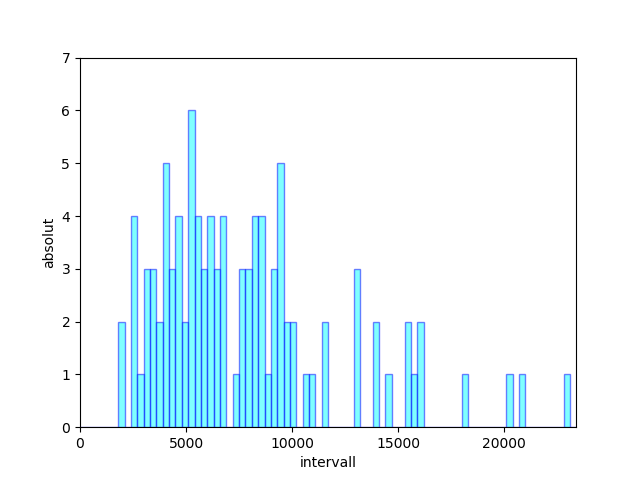

In [12]:
verteilung_bar(thom, li=300)

[0. 0. 0. 1. 2. 4. 5. 4. 7. 6. 6. 7. 6. 5. 1. 6. 4. 5. 7. 5. 0. 1. 1. 2.
 0. 1. 2. 2. 1. 0. 1. 4. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]


<IPython.core.display.Javascript object>


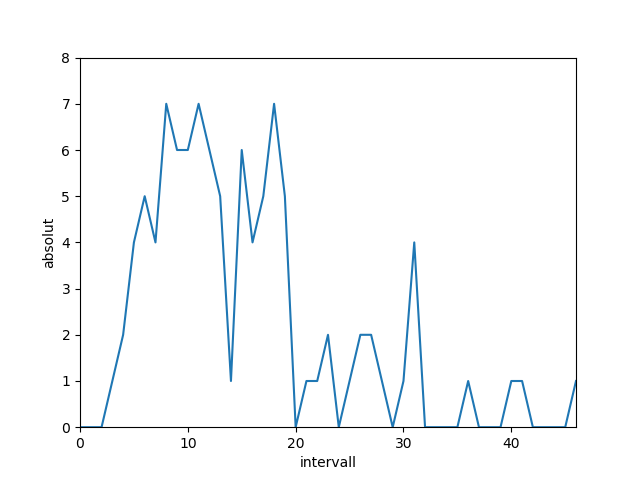

In [5]:
verteilung(thom, li=500)

[ 1943.  2091.  2462.  2544.  2632.  2654.  2926.  3044.  3100.  3244.
  3457.  3473.  3546.  3798.  3889.  3925.  4044.  4158.  4167.  4196.
  4276.  4350.  4440.  4611.  4630.  4730.  4794.  4870.  4882.  5159.
  5183.  5207.  5266.  5308.  5352.  5528.  5562.  5597.  5606.  5713.
  5861.  5890.  6034.  6132.  6177.  6204.  6330.  6418.  6527.  6739.
  6796.  6875.  6882.  7367.  7521.  7585.  7705.  7808.  7896.  7941.
  8175.  8295.  8339.  8355.  8520.  8564.  8570.  8621.  8847.  9011.
  9029.  9132.  9315.  9319.  9404.  9461.  9585.  9611.  9782.  9913.
  9941. 10783. 11050. 11570. 11687. 12951. 13014. 13121. 13933. 13966.
 14468. 15336. 15560. 15731. 15947. 15991. 18217. 20233. 20852. 23082.]
[ 0.  1.  6.  9. 13. 13. 11.  7.  9. 12.  1.  3.  1.  4.  1.  5.  0.  0.
  1.  0.  2.  0.  0.  1.  0.]
[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000.]
[ 0.  1

<IPython.core.display.Javascript object>


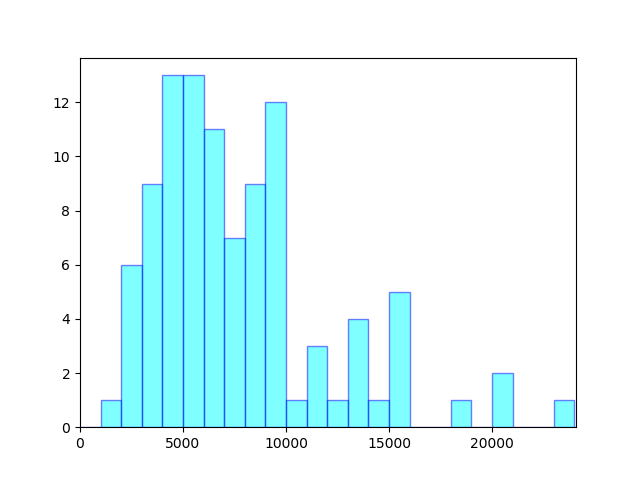

<BarContainer object of 25 artists>

[ 8520.  7367.  9319.  5352.  6882. 15947.  6796.  5207.  5528.  4794.
  4882. 13014.  9461.  4611.  9782.  5861. 10783. 11050.  3546.  4630.
  4730.  3100. 12951.  4350.  9029.  9011.  4870. 15991.  7808.  1943.
  2462.  6330.  2632.  6739.  8175.  8847. 11570. 23082.  7705.  8295.
 15560.  5890.  4167.  6875.  6177.  4196.  7896.  9913.  8570.  3798.
  9315.  3457.  6527.  7941.  6034.  9941.  5266. 15336. 11687.  3473.
  4044.  5183.  6418. 13966.  8564.  3889. 20852.  2091.  9585.  9611.
  5597. 13121.  7585.  4276.  4158.  4440.  2654. 18217. 14468.  6132.
  8339.  6204.  3044.  5562. 13933.  5159.  3925.  8621. 15731.  2544.
  2926.  5606.  9132.  5308.  3244.  8355.  9404.  5713.  7521. 20233.]
8
7
9
5
6
15
6
5
5
4
4
13
9
4
9
5
10
11
3
4
4
3
12
4
9
9
4
15
7
1
2
6
2
6
8
8
11
23
7
8
15
5
4
6
6
4
7
9
8
3
9
3
6
7
6
9
5
15
11
3
4
5
6
13
8
3
20
2
9
9
5
13
7
4
4
4
2
18
14
6
8
6
3
5
13
5
3
8
15
2
2
5
9
5
3
8
9
5
7
20
